# Importer dataset

In [ ]:
import pandas as pd 
url='train.csv'
data=pd.read_csv(url,header='infer')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
X = data.iloc[:,0:20]  #features
y = data.iloc[:,-1]    #target 'price range'
print("Les features")
X

Les features


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [ ]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

# Partie 1 : Visualisation

Text(0.5, 1.0, 'Correlation ')

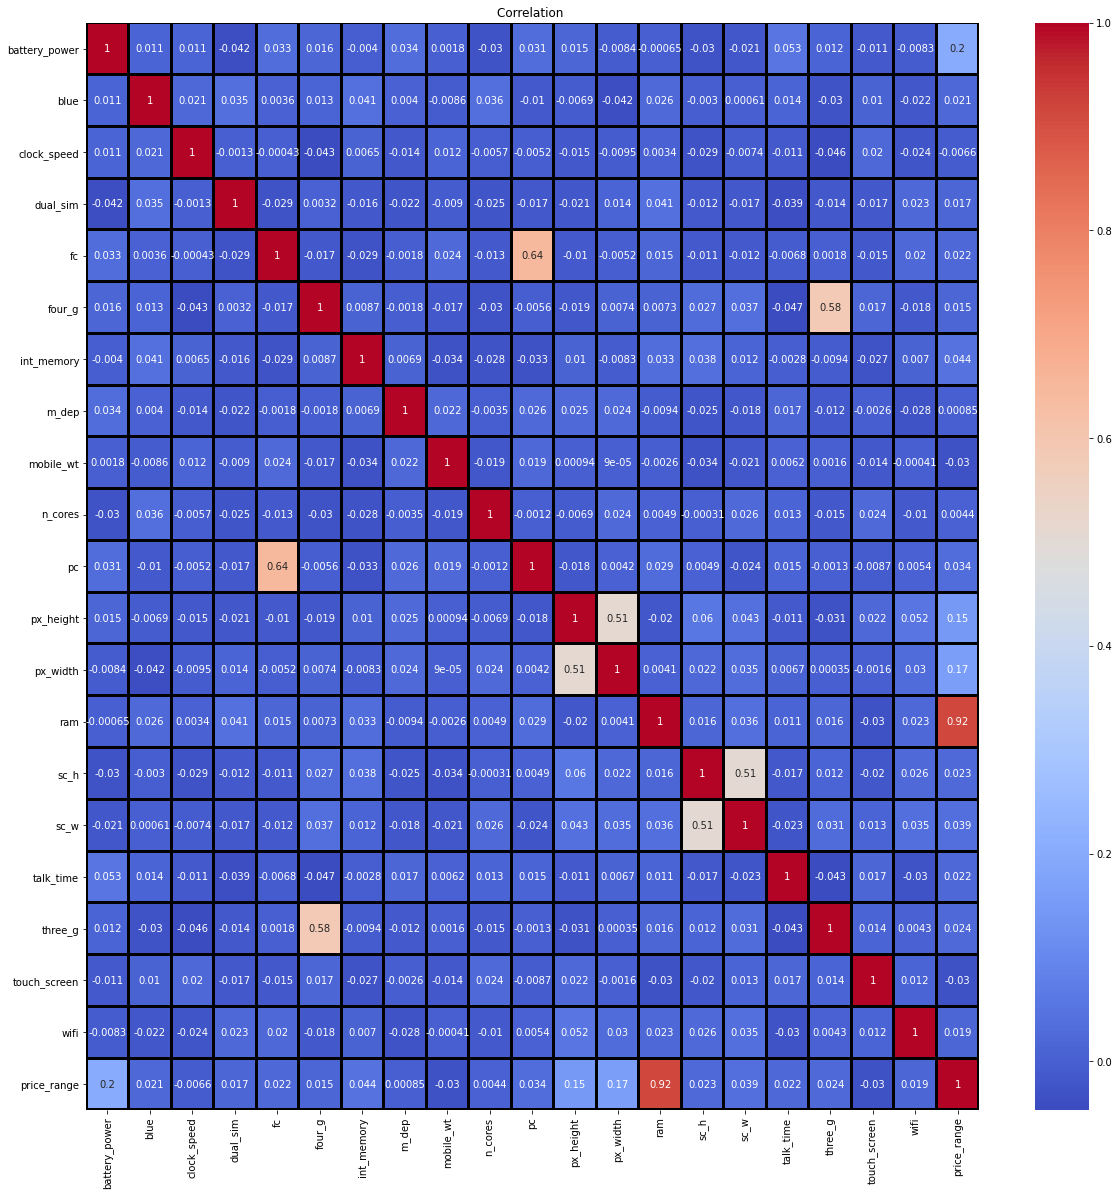

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=data.corr()
plt.figure(figsize=(20,20))
r = sns.heatmap(corr, cmap='coolwarm',annot = True, linecolor='black',linewidths=2)
r.set_title("Correlation ")


In [ ]:
#price range correlation
print('Correlation de price_range et les autres features')
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

Correlation de price_range et les autres features


price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

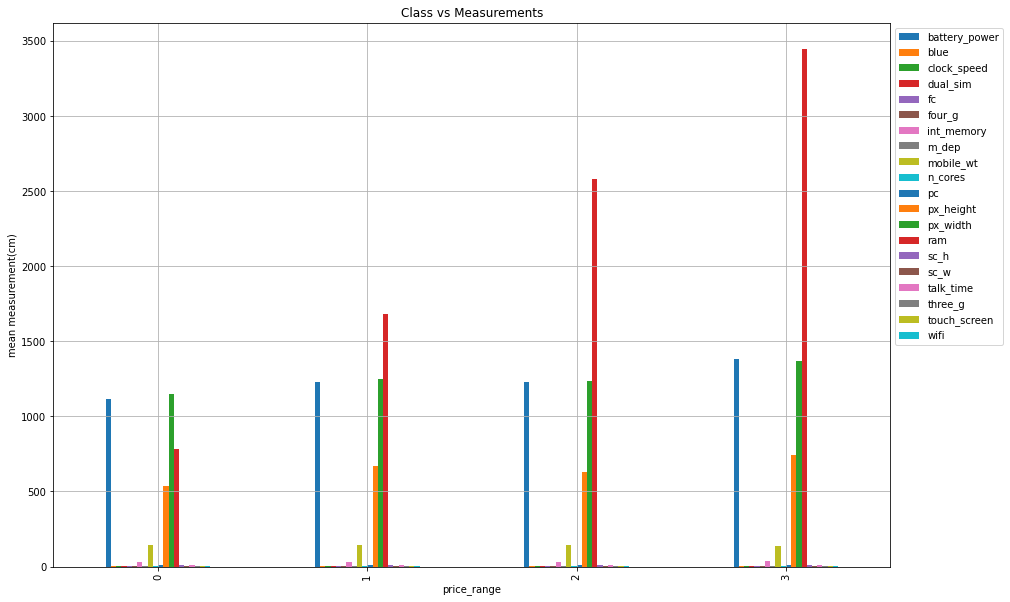

In [ ]:
# moyenne des attributs pour chaque classe 
data.groupby(by = "price_range").mean().plot (kind="bar", figsize=(15, 10))
plt.title('Class vs Measurements')    
plt.ylabel('mean measurement(cm)')
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1,1)) 

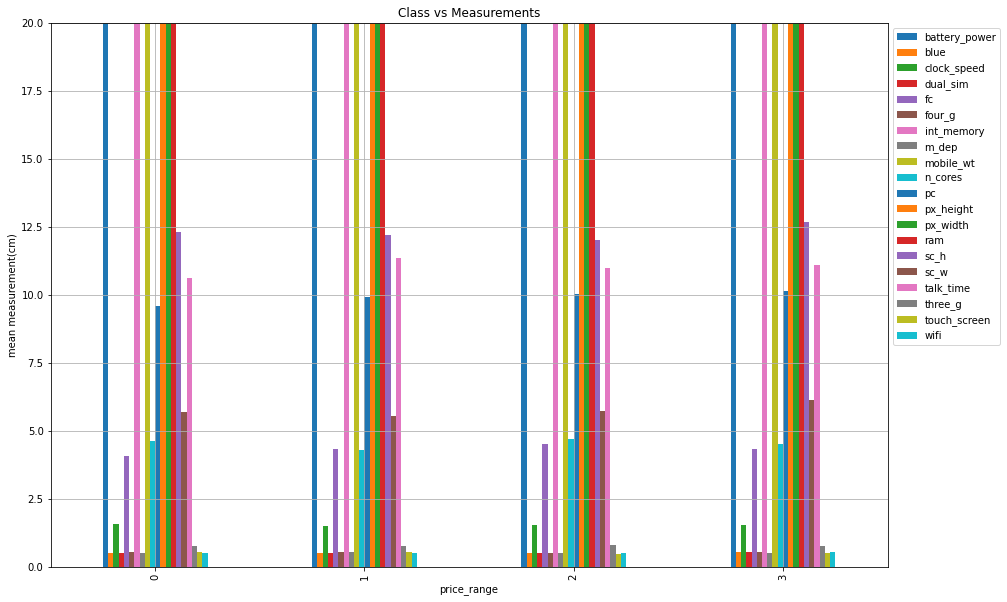

In [ ]:
# moyenne des attributs pour chaque classe 
data.groupby(by = "price_range").mean().plot (kind="bar", figsize=(15, 10))
plt.title('Class vs Measurements')    
plt.ylim(0,20)
plt.ylabel('mean measurement(cm)')
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))    

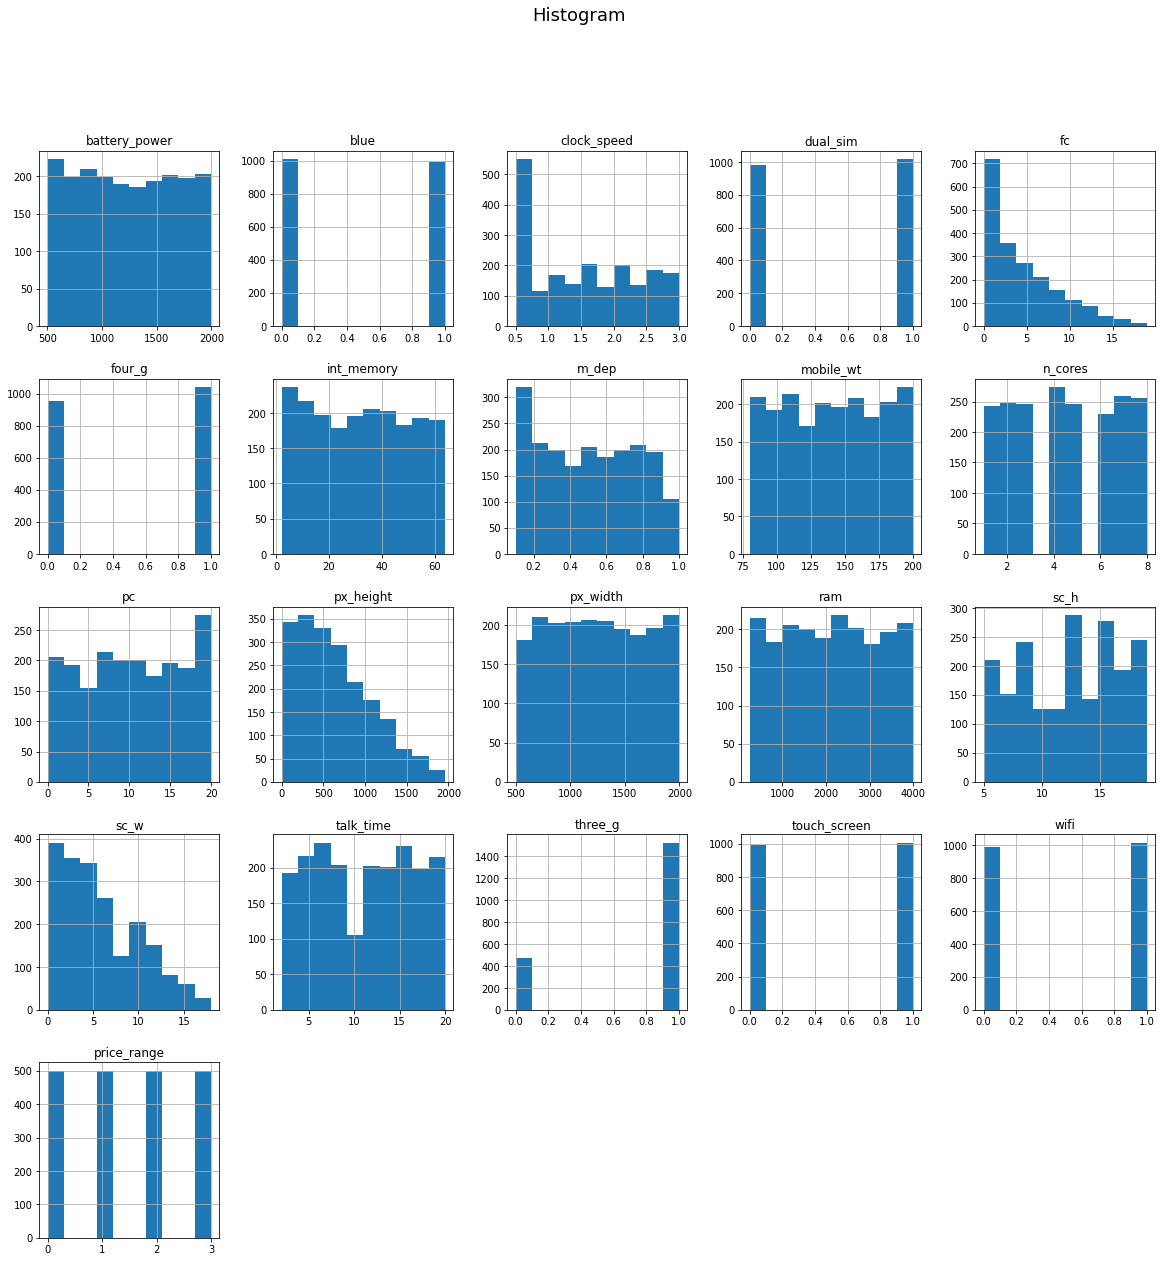

In [ ]:
#histogram 
data.hist(figsize=(20, 20))
plt.suptitle("Histogram", fontsize=18)
plt.show()


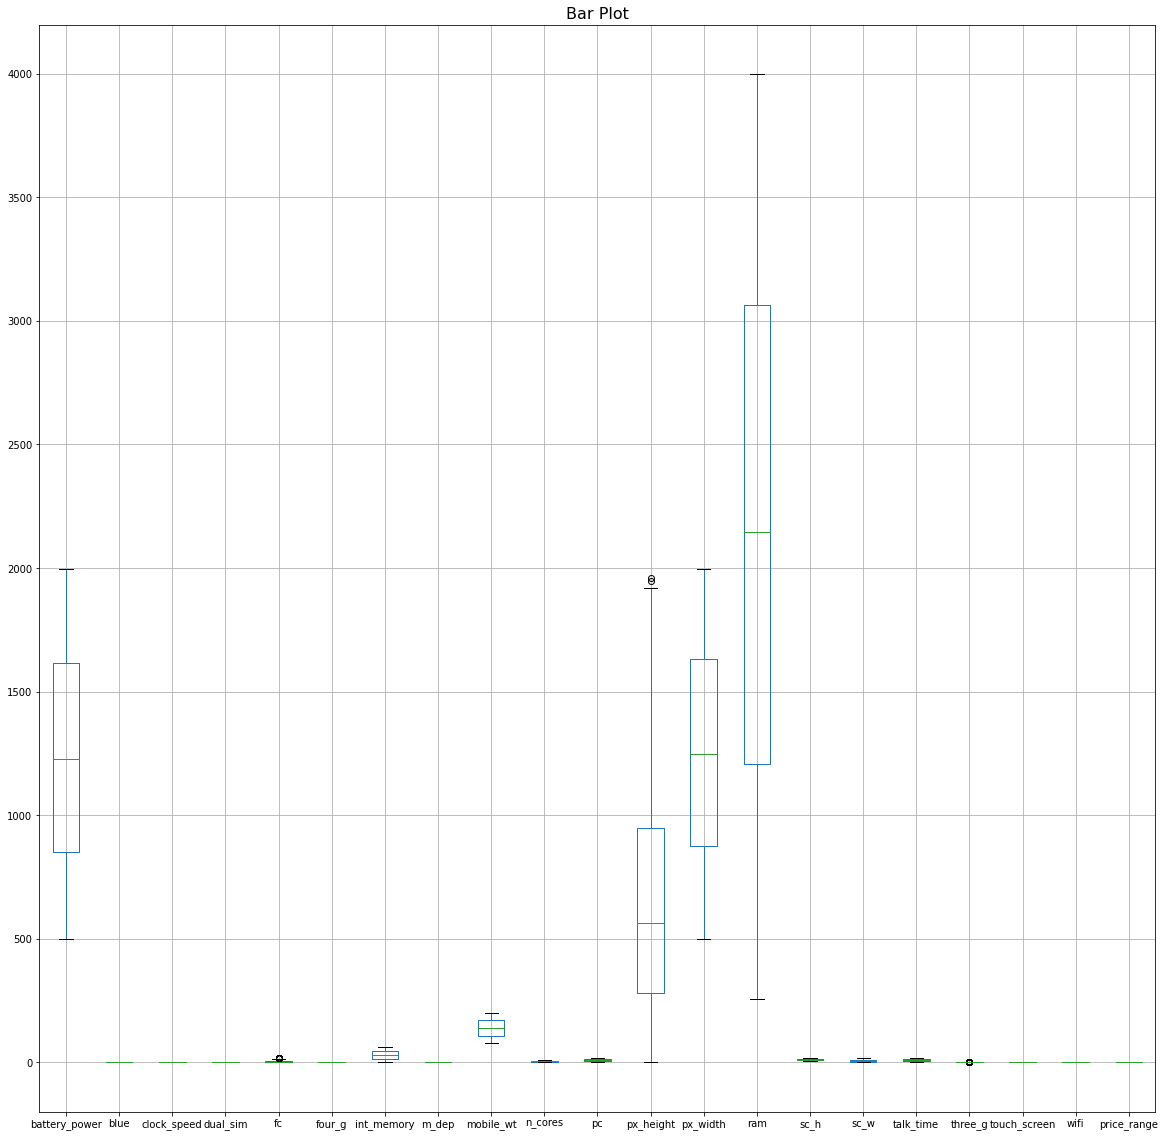

In [ ]:
#Boxplot
data.boxplot(figsize=(20, 20)) 
plt.title("Bar Plot", fontsize=16)
plt.show()

# Partie 2 : Classification (KNN)

In [ ]:
#Construire le modèle K-nearest neighbors 
import numpy as np 
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

model=KNeighborsClassifier(n_neighbors=1)
model.fit(X,y)
y_model=model.predict(X)
accuracy_score(y, y_model)

1.0

L’approche Holdout

In [ ]:
model=KNeighborsClassifier(n_neighbors=5)

X1,X2,y1,y2=train_test_split(X,y,random_state=np.random,train_size=0.7)

y_pred=model.fit(X1,y1).predict(X2)
y2_model=model.predict(X2)

print('Accuracy : ',accuracy_score(y2,y2_model))
print("precision :",precision_score(y2, y2_model,average='weighted'))
print("recall_score :",recall_score(y2,y2_model,average='macro'))
print("f1_score :",f1_score(y2,y2_model,average='weighted'))

Accuracy :  0.9216666666666666
precision : 0.9222327609667176
recall_score : 0.9214446309570767
f1_score : 0.9218175657159873


Cross-validation

In [ ]:
from sklearn.metrics import confusion_matrix

#split the data with 50% in each set
X1,X2,y1,y2=train_test_split(X,y,random_state=0,train_size=0.5)

y2_model=model.fit(X1,y1).predict(X2)
y1_model=model.fit(X2,y2).predict(X1)
accuracy_score(y1,y1_model), accuracy_score(y2,y2_model)

(0.9, 0.911)

5-folds cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X,y,cv=5)

accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
precision = cross_val_score(model, X, y, cv=5, scoring='precision_weighted')
recall = cross_val_score(model, X, y, cv=5, scoring='recall_weighted')
f1_score = cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
print("accuaracy :",accuracy.mean())
print("precision :",precision.mean())
print("recall :",recall.mean())
print("f1_score :",f1_score.mean())

accuaracy : 0.9195
precision : 0.9199288251347415
recall : 0.9195
f1_score : 0.919405862498109


Leave one out cross validation (LOOCV)

In [ ]:
from sklearn.model_selection import LeaveOneOut
scores=cross_val_score(model,X,y,cv=LeaveOneOut())

accuracy = cross_val_score(model, X, y, cv=LeaveOneOut(), scoring='accuracy')
precision = cross_val_score(model, X, y, cv=LeaveOneOut(), scoring='precision_weighted')
recall = cross_val_score(model, X, y, cv=LeaveOneOut(), scoring='recall_weighted')
print("accuaracy :",accuracy.mean())
print("precision :",precision.mean())
print("recall :",recall.mean())
print("f1_score :",2*(precision.mean()*recall.mean())/(recall.mean()+precision.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

accuaracy : 0.907
precision : 0.907
recall : 0.907
f1_score : 0.907


# Les paramètres optimaux : Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model 
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
k_range = list(range(1,31))
param_grid = dict(n_neighbors = k_range)
#print(param_grid)
grid = GridSearchCV(knn2, param_grid, cv=5, scoring ='accuracy')
grid.fit(X,y)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9345000000000001
{'n_neighbors': 11}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')


In [ ]:
knn3 = KNeighborsClassifier()
k_range = list(range(1,10))
param_grid = dict(n_neighbors = k_range)

grid = GridSearchCV(knn3, param_grid, cv=LeaveOneOut(), scoring ='accuracy')
grid.fit(X,y)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.93
{'n_neighbors': 9}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')


# Partie 3 : Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

model1=DecisionTreeClassifier()



In [ ]:
X1,X2,y1,y2=train_test_split(X,y,random_state=np.random,train_size=0.7)

y_pred=model1.fit(X1,y1).predict(X2)
y2_model=model1.predict(X2)

print('Accuracy : ',accuracy_score(y2,y2_model))
print("precision :",precision_score(y2, y2_model,average='weighted'))
print("recall_score :",recall_score(y2,y2_model,average='macro'))

Accuracy :  0.8066666666666666
precision : 0.8060989316423494
recall_score : 0.8107037144671554


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model1,X,y,cv=5)

accuracy = cross_val_score(model1, X, y, cv=5, scoring='accuracy')
precision = cross_val_score(model1, X, y, cv=5, scoring='precision_weighted')
recall = cross_val_score(model1, X, y, cv=5, scoring='recall_weighted')
f1_score = cross_val_score(model1, X, y, cv=5, scoring='f1_weighted')
print("accuaracy :",accuracy.mean())
print("precision :",precision.mean())
print("recall :",recall.mean())
print("f1_score :",f1_score.mean())

accuaracy : 0.8309999999999998
precision : 0.8254473428352626
recall : 0.8285
f1_score : 0.8283612489244214


In [ ]:
from sklearn.model_selection import LeaveOneOut
scores=cross_val_score(model1,X,y,cv=LeaveOneOut())

accuracy = cross_val_score(model1, X, y, cv=LeaveOneOut(), scoring='accuracy')
precision = cross_val_score(model, X, y, cv=LeaveOneOut(), scoring='precision_weighted')
recall = cross_val_score(model, X, y, cv=LeaveOneOut(), scoring='recall_weighted')
print("accuaracy :",accuracy.mean())
print("precision :",precision.mean())
print("recall :",recall.mean())
print("f1_score :",2*(precision.mean()*recall.mean())/(recall.mean()+precision.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

accuaracy : 0.832
precision : 0.907
recall : 0.907
f1_score : 0.907


# Les paramètres optimaux : Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

k_range = list(range(1,31))
param_grid = dict(max_depth = k_range)

grid = GridSearchCV(model1, param_grid, cv=5, scoring ='accuracy')
grid.fit(X,y)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8414999999999999
{'max_depth': 7}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

k_range = list(range(1,6))
param_grid = dict(max_depth = k_range)

grid = GridSearchCV(model1, param_grid, cv=LeaveOneOut(), scoring ='accuracy')
grid.fit(X,y)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.818
{'max_depth': 5}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Visualiser l'arbre

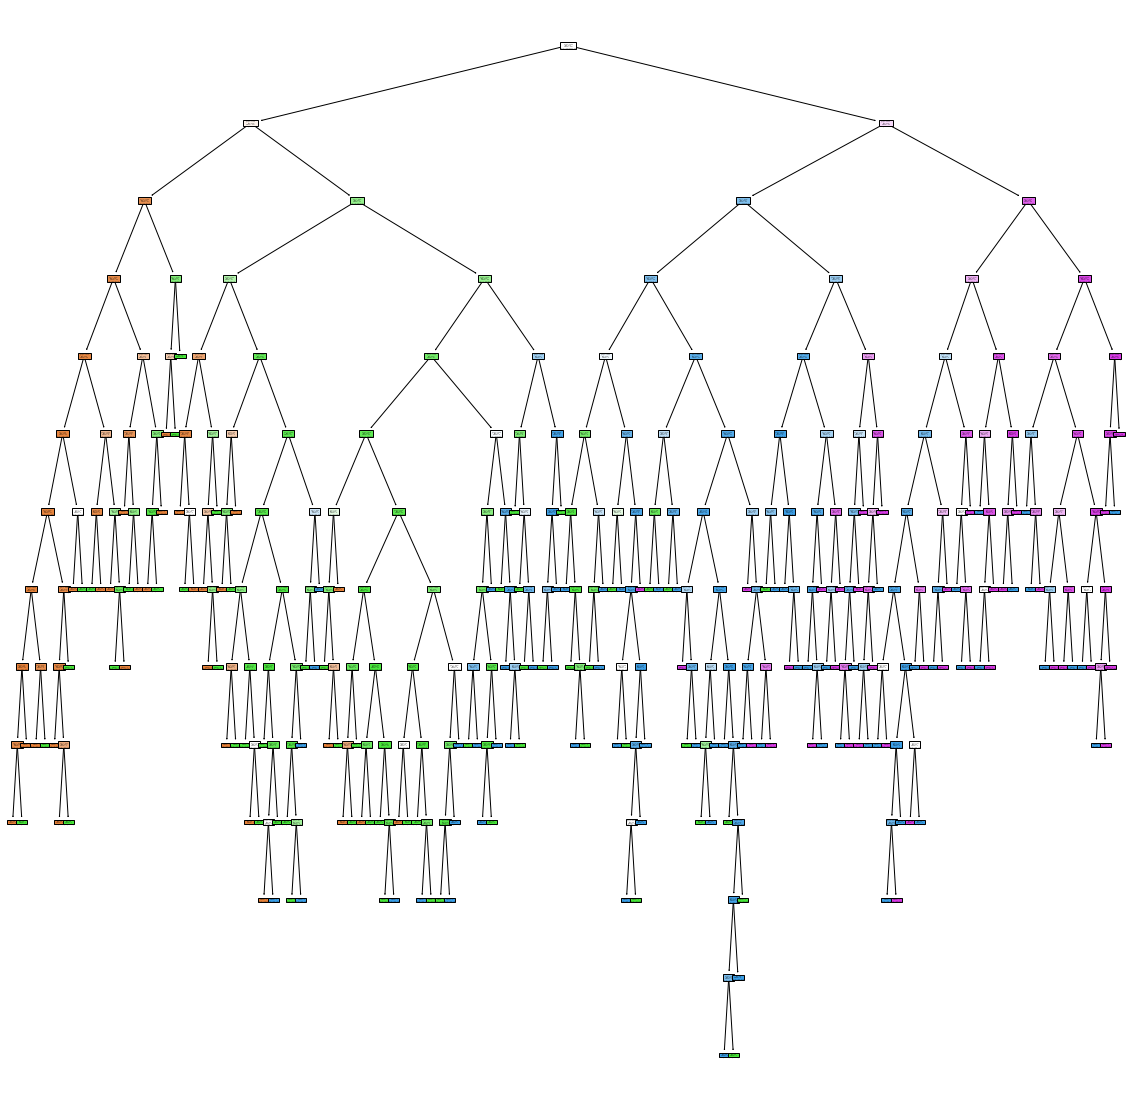

In [ ]:
from sklearn.tree import plot_tree
d=model1.fit(X,y)
plt.figure(figsize=(20,20))
plot_tree(model1,filled=True)
plt.show()

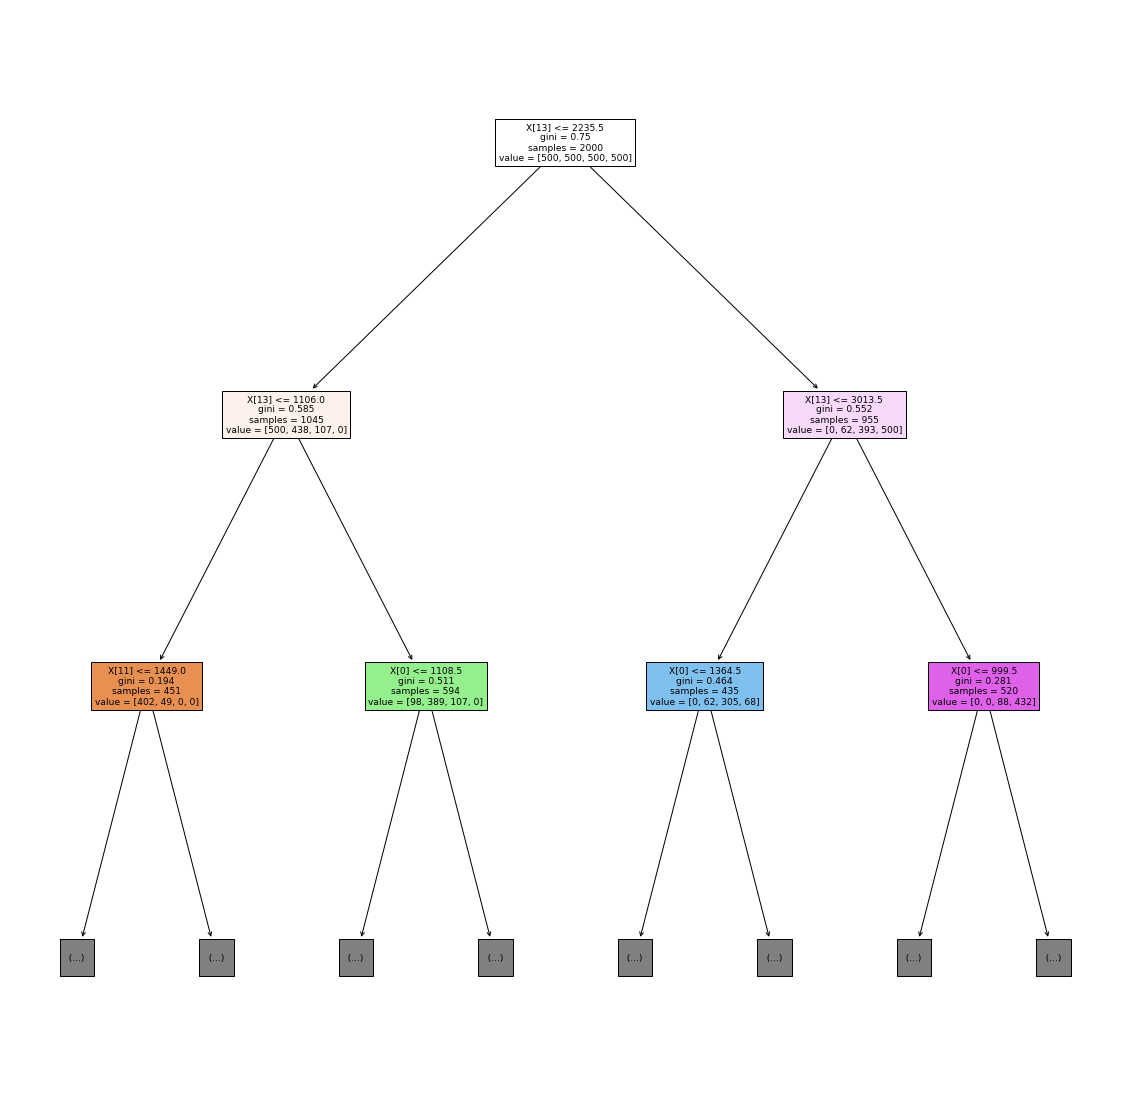

In [ ]:
from sklearn.tree import plot_tree
d=model1.fit(X,y)
plt.figure(figsize=(20,20))
plot_tree(model1,max_depth=2,filled=True)
plt.show()

Partie 4 : Neutral Network

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from numpy import loadtxt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
y = pd.get_dummies(data['price_range'])

In [ ]:
data['price_range']

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [ ]:
y

,0,1,2,3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
1995,1,0,0,0
1996,0,0,1,0
1997,0,0,0,1
1998,1,0,0,0


In [ ]:
model2=Sequential()
model2.add(Dense(40,input_dim=20,activation='relu'))
model2.add(Dense(20,activation='relu'))
model2.add(Dense(4,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.fit(X,y,epochs=50,batch_size=10,validation_split=0.25)

Epoch 1/50
150/150 [==============================] - 1s 4ms/step - loss: 205.4526 - accuracy: 0.2618 - val_loss: 7.2923 - val_accuracy: 0.4480
Epoch 2/50
150/150 [==============================] - 0s 2ms/step - loss: 7.9713 - accuracy: 0.4473 - val_loss: 4.1367 - val_accuracy: 0.5120
Epoch 3/50
150/150 [==============================] - 0s 2ms/step - loss: 3.5660 - accuracy: 0.5014 - val_loss: 2.1118 - val_accuracy: 0.5140
Epoch 4/50
150/150 [==============================] - 0s 2ms/step - loss: 2.4568 - accuracy: 0.5423 - val_loss: 2.1822 - val_accuracy: 0.5760
Epoch 5/50
150/150 [==============================] - 0s 2ms/step - loss: 2.1536 - accuracy: 0.5687 - val_loss: 2.3594 - val_accuracy: 0.5520
Epoch 6/50
150/150 [==============================] - 0s 2ms/step - loss: 2.0818 - accuracy: 0.5910 - val_loss: 1.1643 - val_accuracy: 0.6380
Epoch 7/50
150/150 [==============================] - 0s 2ms/step - loss: 1.9357 - accuracy: 0.5887 - val_loss: 1.5017 - val_accuracy: 0.6300
Epoc

In [ ]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier

def create_model():
  model3=Sequential()
  model3.add(Dense(40,input_dim=20,activation='relu'))
  model3.add(Dense(20,activation='relu'))
  model3.add(Dense(4,activation='softmax'))
  #compiler modele
  model3.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
  return model3

model3=KerasClassifier(build_fn=create_model,verbose=0)
#définir le grid pour les parametres
batch_size=[10,20,30]
epochs=[10,30,50]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid=GridSearchCV(estimator=model3,param_grid=param_grid,n_jobs=-1)
grid_result=grid.fit(X,y)

print("Best: %f using %s"%(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']

print("best parametres set found on developpement set:")
print()
print(grid_result.best_params_)
print()
for mean, stedv, param in zip(means,stds,params):
  print("%f (%f) with %r" % (mean,stedv,param))


Best: 0.685500 using {'batch_size': 10, 'epochs': 50}
best parametres set found on developpement set:

{'batch_size': 10, 'epochs': 50}

0.577500 (0.090650) with {'batch_size': 10, 'epochs': 10}
0.646000 (0.023906) with {'batch_size': 10, 'epochs': 30}
0.685500 (0.015443) with {'batch_size': 10, 'epochs': 50}
0.596500 (0.051127) with {'batch_size': 20, 'epochs': 10}
0.634500 (0.049960) with {'batch_size': 20, 'epochs': 30}
0.631000 (0.057022) with {'batch_size': 20, 'epochs': 50}
0.604000 (0.007176) with {'batch_size': 30, 'epochs': 10}
0.606500 (0.062662) with {'batch_size': 30, 'epochs': 30}
0.624500 (0.041994) with {'batch_size': 30, 'epochs': 50}
